In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#%% settings
#for windows
#file = 'sample_data\\201805\\RL7785--1K-20180517102718_crv.csv'
#file_rlt = 'sample_data\\201805\\RL7785--1K-20180517102718_rlt.csv'
file = 'sample_data/201805/RL7785--1K-20180517102718_crv.csv'
file_rlt = 'sample_data/201805/RL7785--1K-20180517102718_rlt.csv'

In [29]:
#%% read files and parameters
data = pd.read_csv(file, sep=',', encoding='shift_jis', skiprows=1)
data_rlt = pd.read_csv(file_rlt, sep=',', encoding='shift_jis')

L = 64  # span
b = float(data_rlt.iloc[2, 3]) # width of first specimen
h = float(data_rlt.iloc[2, 4]) # height of first specimen
print('span, width, height of first specimen:', L, ',', b, ',', h)

span, width, height of first specimen: 64 , 9.815 , 3.945


In [30]:
#cut out curve of first specimen
col = ['mm', 'N']
data = data.reindex(columns=col)
data.head()

,mm,N
0,0.000,0.10
1,0.001,0.18
2,0.002,0.25
3,0.003,0.32
4,0.004,0.41


In [39]:
#%% convert (mm, N) to (%, MPa)
# sigma = 3*F*L / (2*b*h^2)
# epsilon = 6*100*s*h / (L^2)
# F: load, L:span = 64 mm, b:width, h:height, s=strain/mm

data['strain'] = data['mm'] * 6 * 100 * h / L / L
data['stress'] = data['N'] * 3 * L / (2 * b * h * h)
data

,mm,N,strain,stress
0,0.000,0.10,0.000000,0.062847
1,0.001,0.18,0.000578,0.113125
2,0.002,0.25,0.001156,0.157118
3,0.003,0.32,0.001734,0.201111
4,0.004,0.41,0.002312,0.257674
5,0.005,0.48,0.002889,0.301667
6,0.006,0.54,0.003467,0.339376
7,0.007,0.65,0.004045,0.408508
8,0.008,0.67,0.004623,0.421077
9,0.009,0.76,0.005201,0.477640


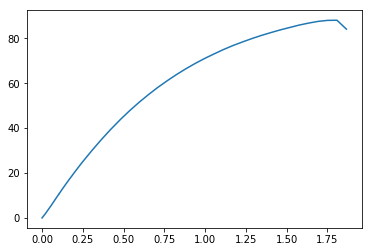

In [40]:
plt.plot(data['strain'], data['stress'])
plt.xlabel = 'strain / %'
plt.ylabel = 'stress / N'
plt.show()